# Imports

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
import numpy as np


# Product Study

In [208]:
url = 'Consumidores.xls'
df = pd.read_excel(url)
df = df.iloc[:,:7]
name_columns =  ['years','total','4+', '1-3', '-1','<<1','0']
df.columns = name_columns
df['years'] = df['years'].replace({
    '        Total':'Total',
    '        De 16 a 24 años': '16-24',
    '        De 25 a 34 años': '25-34',
    '        De 35 a 44 años': '35-44',
    '        De 45 a 54 años': '45-54',
    '        De 55 a 64 años': '55-64',
    '        De 65 a 74 años': '65-74',
    '        De 75 y más años': '75+'
})

In [209]:
df_both = df.loc[37:44]
df_both.index = range(1, len(df_both)+1)
df_both['total_cons'] = df_both['4+']+df_both['1-3']+df_both['-1']+df_both['<<1']
df_mens = df.loc[46:53]
df_mens.index = range(1, len(df_mens)+1)
df_mens['total_cons'] = df_mens['4+']+df_mens['1-3']+df_mens['-1']+df_mens['<<1']
df_womens = df.loc[55:62]
df_womens.index = range(1, len(df_womens)+1)
df_womens['total_cons'] = df_womens['4+']+df_womens['1-3']+df_womens['-1']+df_womens['<<1']

C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_16024\271870719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_both['total_cons'] = df_both['4+']+df_both['1-3']+df_both['-1']+df_both['<<1']
C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_16024\271870719.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mens['total_cons'] = df_mens['4+']+df_mens['1-3']+df_mens['-1']+df_mens['<<1']
C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_16024\271870719.py:9: SettingWithCopyWarning: 
A value is tryi

In [210]:
df_both['years'].unique()

array(['Total', '16-24', '25-34', '35-44', '45-54', '55-64', '65-74',
       '75+'], dtype=object)

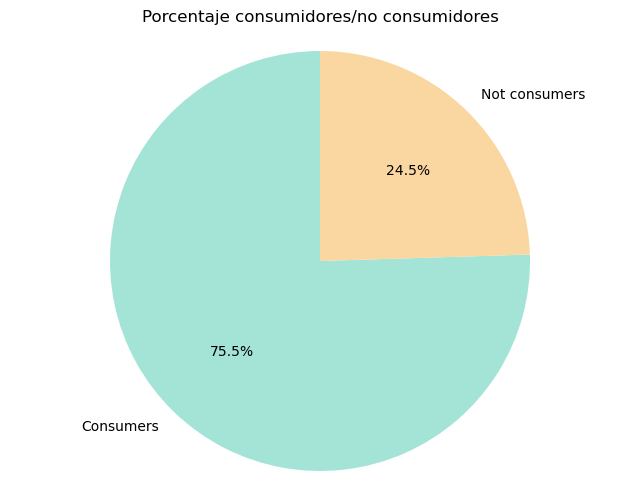

In [211]:
# Definir los nombres de las porciones y los valores
labels = ['Consumers', 'Not consumers']
values = [df_both['total_cons'].iloc[0], df_both['0'].iloc[0]]

# Definir colores pastel en verde y salmón
colors = ['#A3E4D7', '#FAD7A0']  # Verde pastel y salmón pastel

# Crear la gráfica de pastel
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Asegurarse de que el gráfico sea circular
ax.axis('equal')

# Añadir título
plt.title('Porcentaje consumidores/no consumidores')

# Mostrar la gráfica
plt.show()

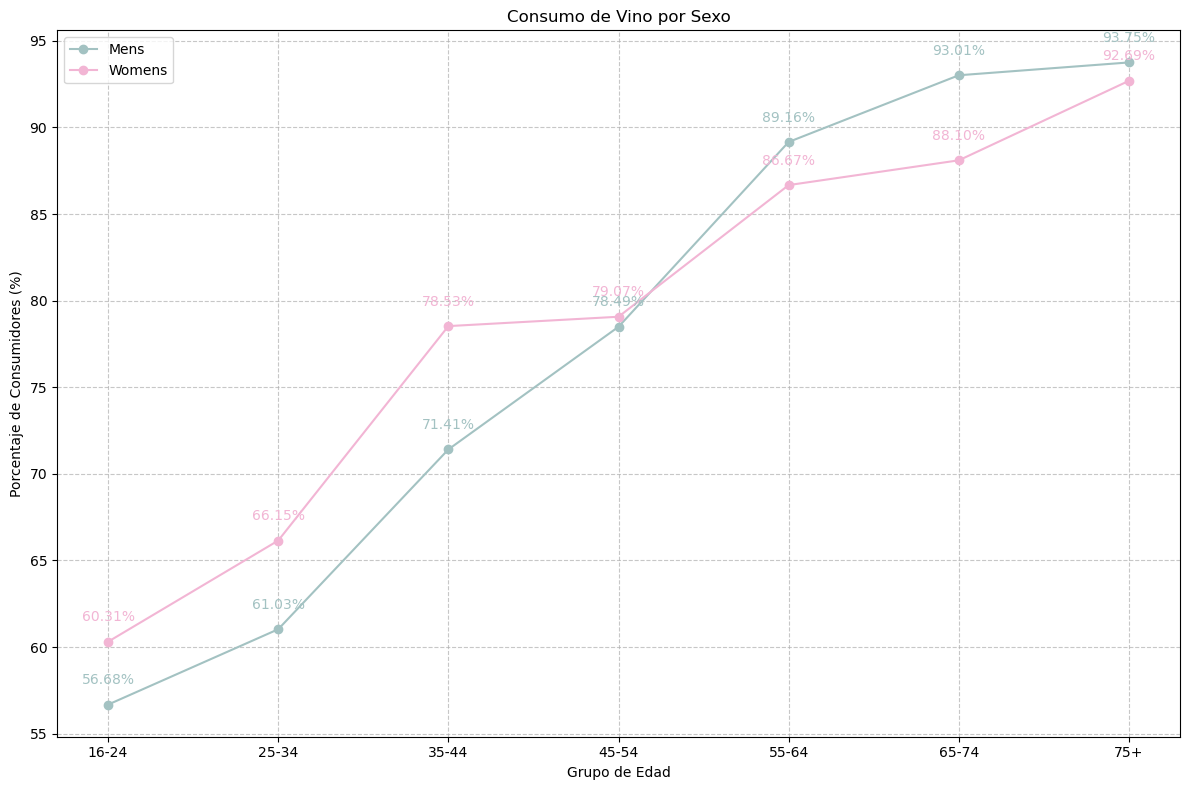

In [212]:
# Filtrar los DataFrames para eliminar la fila 'Total'
df_mens_filtered = df_mens[df_mens['years'] != 'Total']
df_womens_filtered = df_womens[df_womens['years'] != 'Total']

# Crear la gráfica
plt.figure(figsize=(12, 8))

# Graficar el consumo de vino
plt.plot(df_mens_filtered['years'], df_mens_filtered['total_cons'], marker='o', label='Mens', color='#a3c2c2')  # Blue
plt.plot(df_womens_filtered['years'], df_womens_filtered['total_cons'], marker='o', label='Womens', color='#f2b5d4')  # Pink

# Añadir etiquetas y título
plt.xlabel('Grupo de Edad')
plt.ylabel('Porcentaje de Consumidores (%)')
plt.title('Consumo de Vino por Sexo')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir los valores en la gráfica
for i in range(len(df_mens_filtered)):
    plt.text(i, df_mens_filtered['total_cons'].iloc[i] + 1, f'{df_mens_filtered["total_cons"].iloc[i]:.2f}%', ha='center', va='bottom', color='#a3c2c2')
    plt.text(i, df_womens_filtered['total_cons'].iloc[i] + 1, f'{df_womens_filtered["total_cons"].iloc[i]:.2f}%', ha='center', va='bottom', color='#f2b5d4')

plt.tight_layout()

# Mostrar la gráfica
plt.show()

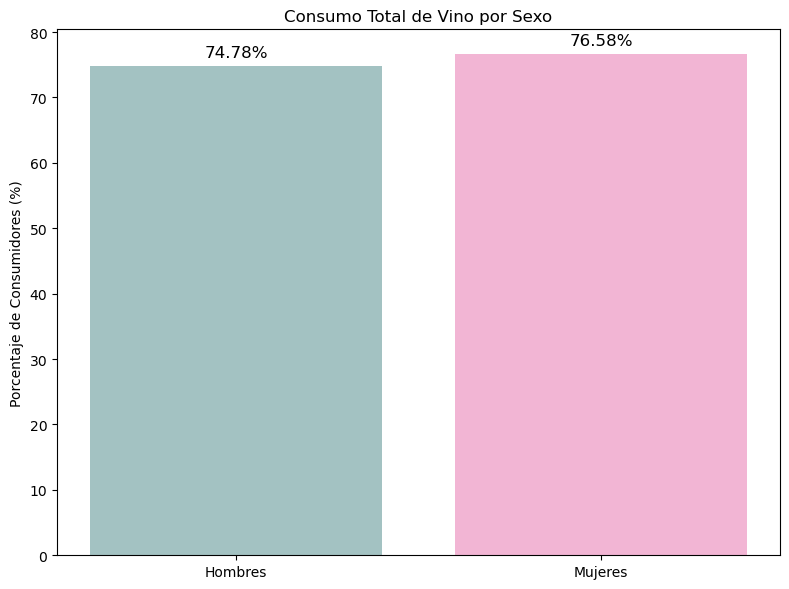

In [213]:
total_men = df_mens[df_mens['years'] == 'Total']
total_women = df_womens[df_womens['years'] == 'Total']

# Crear la gráfica
plt.figure(figsize=(8, 6))

# Graficar el total de consumo de vino
plt.bar('Hombres', total_men['total_cons'].values[0], color='#a3c2c2')  # Verde pastel
plt.bar('Mujeres', total_women['total_cons'].values[0], color='#f2b5d4')  # Rosa pastel

# Añadir etiquetas y título
plt.ylabel('Porcentaje de Consumidores (%)')
plt.title('Consumo Total de Vino por Sexo')
plt.tight_layout()

# Añadir el valor encima de cada barra
for index, value in enumerate([total_men['total_cons'].values[0], total_women['total_cons'].values[0]]):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontsize=12, color='black')

# Mostrar la gráfica
plt.show()

C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_16024\3069016614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='years', y='total_cons', data=df_both.loc[2:8], palette='viridis')


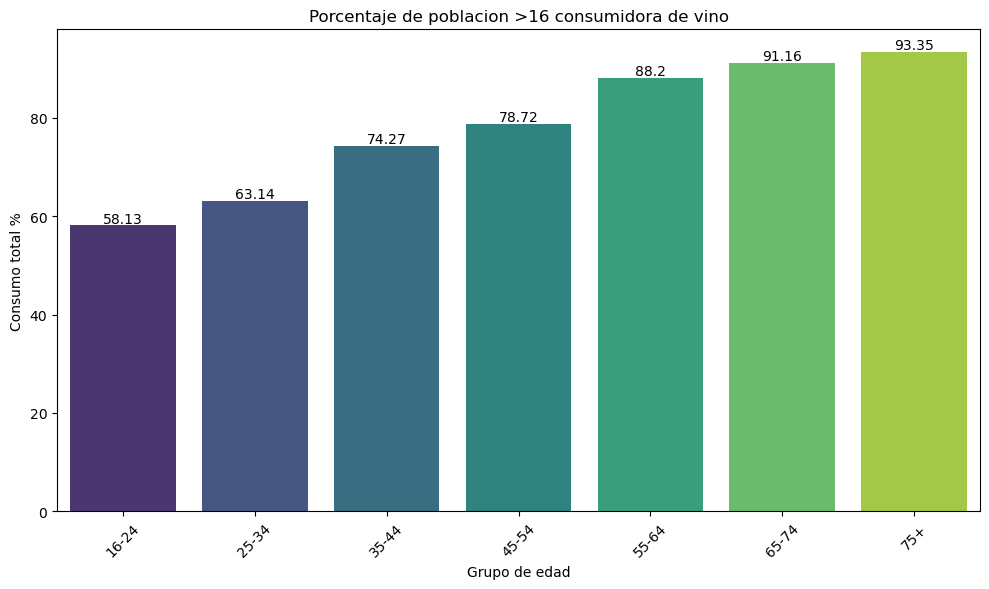

In [214]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='years', y='total_cons', data=df_both.loc[2:8], palette='viridis')

#sns.barplot(x='years', y='total_cons', data=df_both.loc[2:8], palette='viridis')
plt.title('Porcentaje de poblacion >16 consumidora de vino')
plt.xlabel('Grupo de edad')
plt.ylabel('Consumo total %')
plt.xticks(rotation=45)  # Opcional: rotar las etiquetas del eje x si es necesario
for p in ax.patches:
    height = p.get_height()
    rounded_height = round(height, 2)  # Redondear el valor
    ax.annotate(f'{rounded_height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5),  # Desplazamiento del texto
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Marketing Study

In [276]:
url = 'marketing_campaign.xlsx'
df = pd.read_excel(url)

In [277]:
df.shape

(2240, 29)

In [278]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [279]:
df.columns = df.columns.str.strip()

In [280]:
df = df.dropna()

In [281]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [282]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [283]:
def education_level(education):
    if education in ["PhD","Master"]:
        return "High"
    elif education in ['2n Cycle', 'Graduation']:
        return "Middle"
    elif education in ['Basic']:
        return "Low"
df["Education_level"] = df["Education"].apply(education_level)

In [284]:
df['Education_level'].unique()

array(['Middle', 'High', 'Low'], dtype=object)

In [285]:
def living_status(marital_status):
    if marital_status in ['Alone', 'Absurd', 'YOLO', 'Widow', 'Divorced']:
        return 'Living Alone'
    else:
        return 'Living with Others'
    
df['Living_Status'] = df['Marital_Status'].apply(living_status)

In [286]:
df["Age"] = 2022 - df["Year_Birth"]

In [287]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [288]:
df['Average_Spend'] = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)) / df['NumDealsPurchases']

In [289]:
df['Spent'] = df['MntWines']+df["MntWines"] +df['MntFruits']+ df['MntMeatProducts'] +df['MntFishProducts']+df['MntSweetProducts']+ df['MntGoldProds']

In [290]:
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)

In [291]:
df['ID'].nunique()

2216

In [292]:
to_drop = ['Z_CostContact', 'Year_Birth', 'ID']
df = df.drop(to_drop, axis=1)

In [314]:
df = df.drop_duplicates()

In [315]:
df.keys()

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_Revenue', 'Response', 'Education_level', 'Living_Status',
       'Age', 'Total_Campaigns_Accepted', 'Average_Spend', 'Spent',
       'Is_Parent'],
      dtype='object')

In [316]:
df['Age'].unique()

array([65, 68, 57, 38, 41, 55, 51, 37, 48, 72, 46, 63, 70, 35, 76, 42, 73,
       40, 43, 71, 53, 33, 59, 52, 49, 79, 47, 26, 54, 58, 45, 44, 67, 56,
       34, 74, 64, 50, 62, 39, 77, 31, 60, 69, 66, 30, 61, 36, 32, 75, 29,
       28, 81, 78, 27, 82], dtype=int64)

In [318]:
df['MntWines'].mean()

305.2486459871984

In [319]:
df = df[df['Age']<100]
df_wine = df[df['MntWines']>200]

C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_16024\2764645167.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wine['Age_Range'] = pd.cut(df_wine['Age'], bins=bins, labels=labels, right=False)
C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_16024\2764645167.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df_wine.groupby('Age_Range').agg({


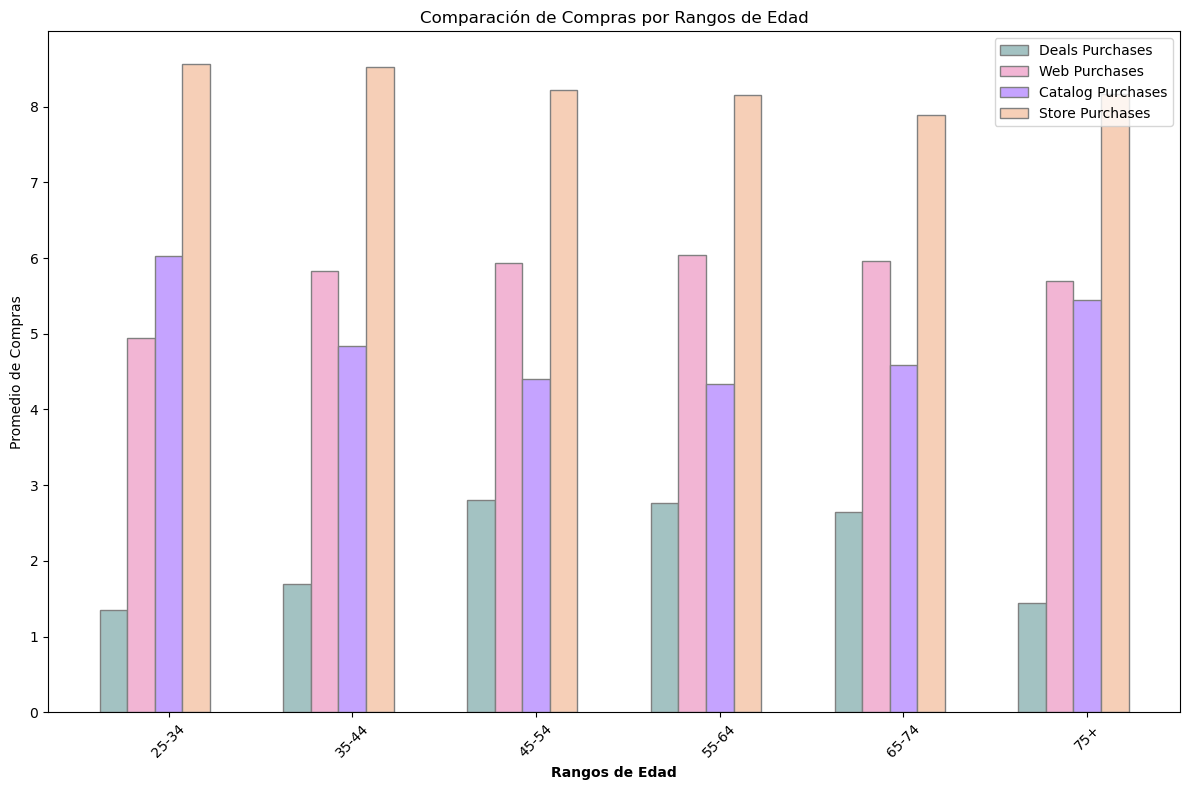

In [320]:
import numpy as np
# Crear los rangos de edad
bins = [24, 34, 44, 54, 64, 74, 100]  # Edades para los rangos
labels = ['25-34', '35-44', '45-54', '55-64', '65-74', '75+']

df_wine['Age_Range'] = pd.cut(df_wine['Age'], bins=bins, labels=labels, right=False)

# Calcular el promedio de cada variable para cada rango de edad
age_grouped = df_wine.groupby('Age_Range').agg({
    'NumDealsPurchases': 'mean',
    'NumWebPurchases': 'mean',
    'NumCatalogPurchases': 'mean',
    'NumStorePurchases': 'mean',
}).reset_index()

# Parámetros de la gráfica
bar_width = 0.15  # Ancho de cada barra
rango_edades = np.arange(len(age_grouped))  # Posiciones de las edades en el eje x

# Crear las posiciones de las barras para cada variable
r1 = rango_edades
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
#r5 = [x + bar_width for x in r4]

# Crear la gráfica de barras separadas
plt.figure(figsize=(12, 8))

plt.bar(r1, age_grouped['NumDealsPurchases'], color='#a3c2c2', width=bar_width, edgecolor='grey', label='Deals Purchases')
plt.bar(r2, age_grouped['NumWebPurchases'], color='#f2b5d4', width=bar_width, edgecolor='grey', label='Web Purchases')
plt.bar(r3, age_grouped['NumCatalogPurchases'], color='#c5a3ff', width=bar_width, edgecolor='grey', label='Catalog Purchases')
plt.bar(r4, age_grouped['NumStorePurchases'], color='#f6cfb7', width=bar_width, edgecolor='grey', label='Store Purchases')
#plt.bar(r5, age_grouped['NumWebVisitsMonth'], color='#b5d8f2', width=bar_width, edgecolor='grey', label='NumWebVisitsMonth')

# Añadir etiquetas y título
plt.xlabel('Rangos de Edad', fontweight='bold')
plt.xticks([r + bar_width*2 for r in range(len(age_grouped))], age_grouped['Age_Range'], rotation=45)
plt.ylabel('Promedio de Compras')
plt.title('Comparación de Compras por Rangos de Edad')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()

C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_16024\561164456.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wine['Age_Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_16024\561164456.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_visitas = df_wine.groupby('Age_Range')['NumWebVisitsMonth'].mean().reset_index()
C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_16024\561164456.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

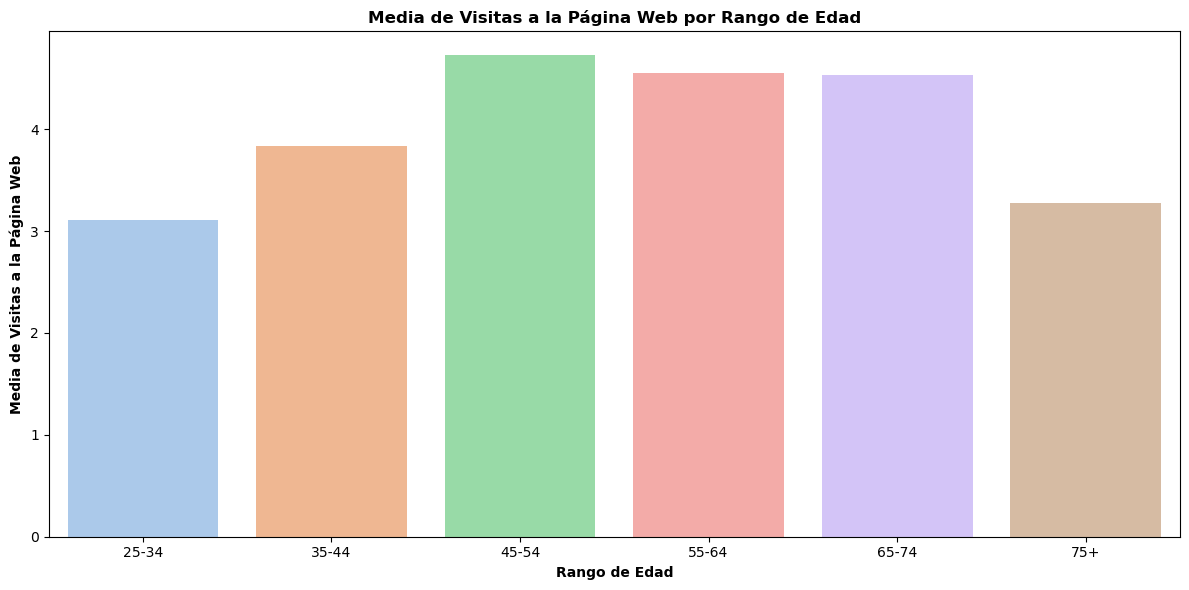

In [321]:
# Definir los rangos de edad
bins = [24, 34, 44, 54, 64, 74, 100]
labels = ['25-34', '35-44', '45-54', '55-64', '65-74', '75+']
df_wine['Age_Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Calcular la media de visitas a la página web por rango de edad
media_visitas = df_wine.groupby('Age_Range')['NumWebVisitsMonth'].mean().reset_index()

# Ordenar los datos por el rango de edad
media_visitas = media_visitas.sort_values(by='Age_Range')

# Crear la figura y los ejes
plt.figure(figsize=(12, 6))

# Crear la gráfica de barras
sns.barplot(x='Age_Range', y='NumWebVisitsMonth', data=media_visitas, palette='pastel')

# Añadir etiquetas y título
plt.xlabel('Rango de Edad', fontweight='bold')
plt.ylabel('Media de Visitas a la Página Web', fontweight='bold')
plt.title('Media de Visitas a la Página Web por Rango de Edad', fontweight='bold')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [322]:
df_income = df[(df['Income']<110000) & (df['Income'] > 15000)]

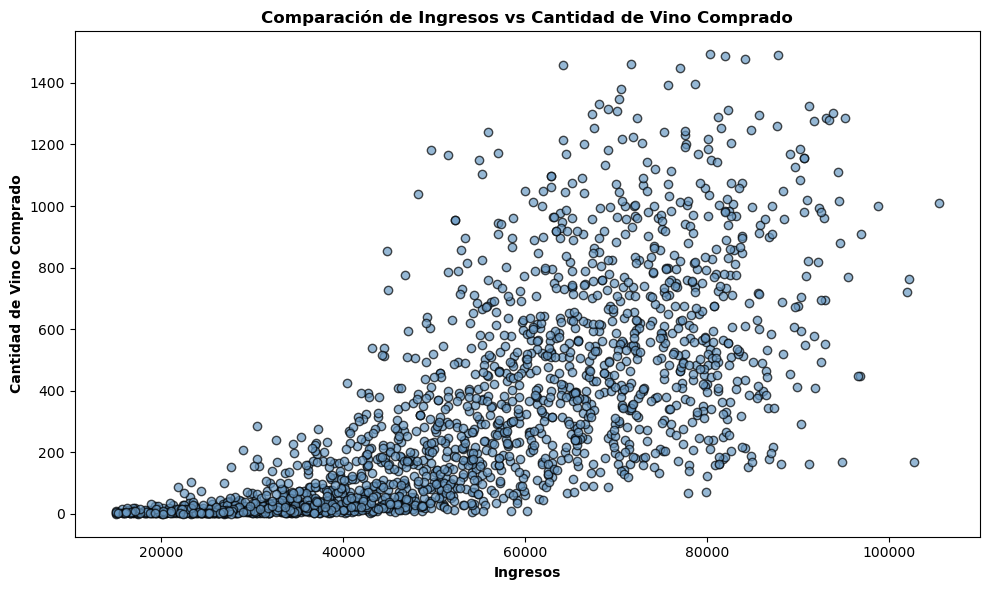

In [323]:
# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_income['Income'], df_income['MntWines'], color='#6a9ac4', alpha=0.7, edgecolor='k')

# Añadir etiquetas y título
plt.xlabel('Ingresos', fontweight='bold')
plt.ylabel('Cantidad de Vino Comprado', fontweight='bold')
plt.title('Comparación de Ingresos vs Cantidad de Vino Comprado', fontweight='bold')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

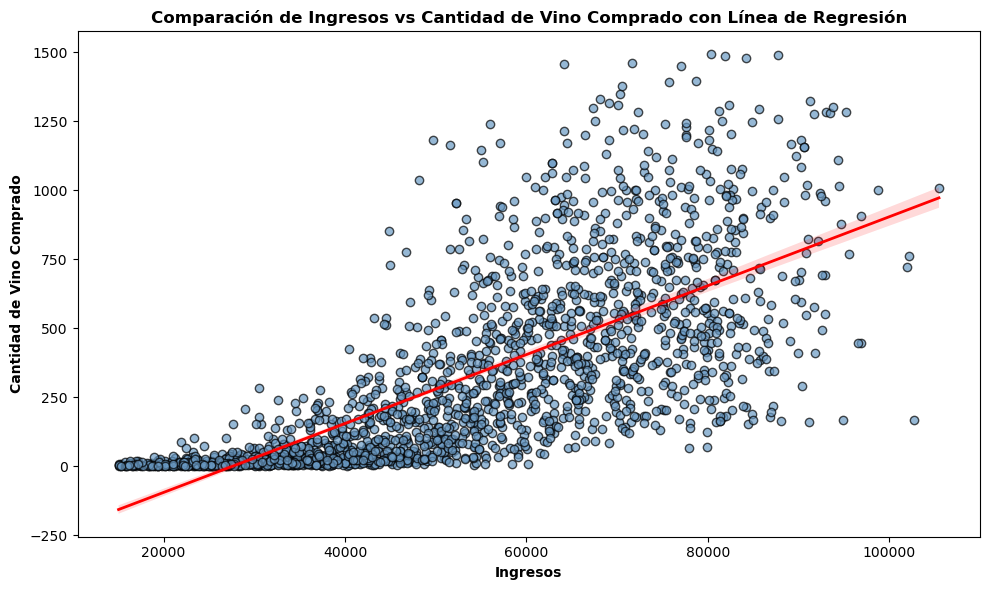

In [324]:
# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Crear la gráfica de dispersión con la línea de regresión
sns.regplot(x='Income', y='MntWines', data=df_income, scatter_kws={'color': '#6a9ac4', 'alpha': 0.7, 'edgecolor': 'k'}, line_kws={'color': 'red', 'lw': 2})

# Añadir etiquetas y título
plt.xlabel('Ingresos', fontweight='bold')
plt.ylabel('Cantidad de Vino Comprado', fontweight='bold')
plt.title('Comparación de Ingresos vs Cantidad de Vino Comprado con Línea de Regresión', fontweight='bold')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_16024\2752287983.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education_level', y='MntWines', data=education_mean, palette='pastel')


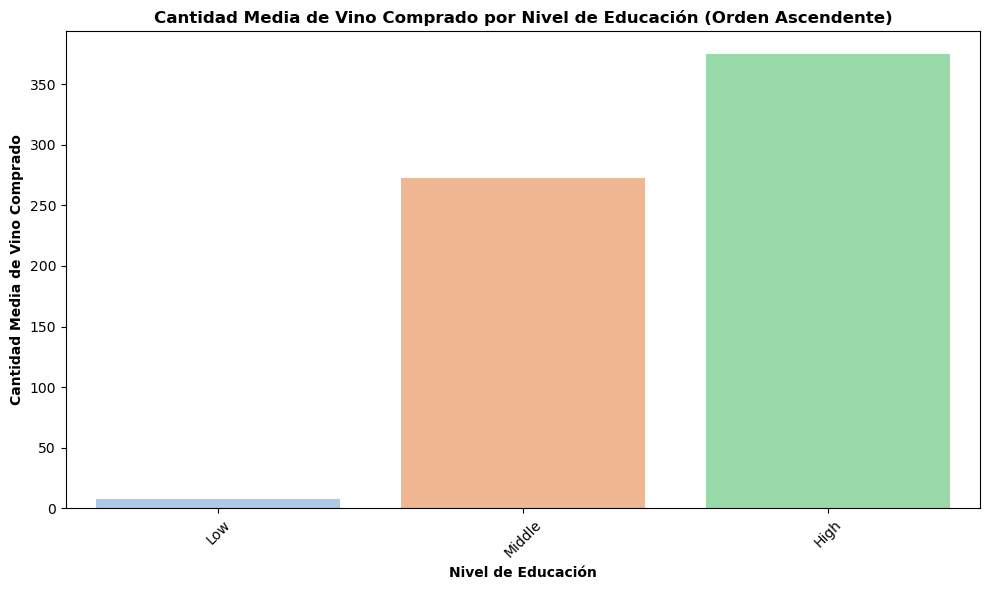

In [325]:
# Calcular la media del gasto en vino por nivel de educación
education_mean = df.groupby('Education_level')['MntWines'].mean().reset_index()

# Ordenar los datos por la media del gasto en vino en orden ascendente
education_mean = education_mean.sort_values(by='MntWines')

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Crear la gráfica de barras con seaborn, usando los datos ordenados
sns.barplot(x='Education_level', y='MntWines', data=education_mean, palette='pastel')

# Añadir etiquetas y título
plt.xlabel('Nivel de Educación', fontweight='bold')
plt.ylabel('Cantidad Media de Vino Comprado', fontweight='bold')
plt.title('Cantidad Media de Vino Comprado por Nivel de Educación (Orden Ascendente)', fontweight='bold')

# Rotar etiquetas del eje X para mejor visualización
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

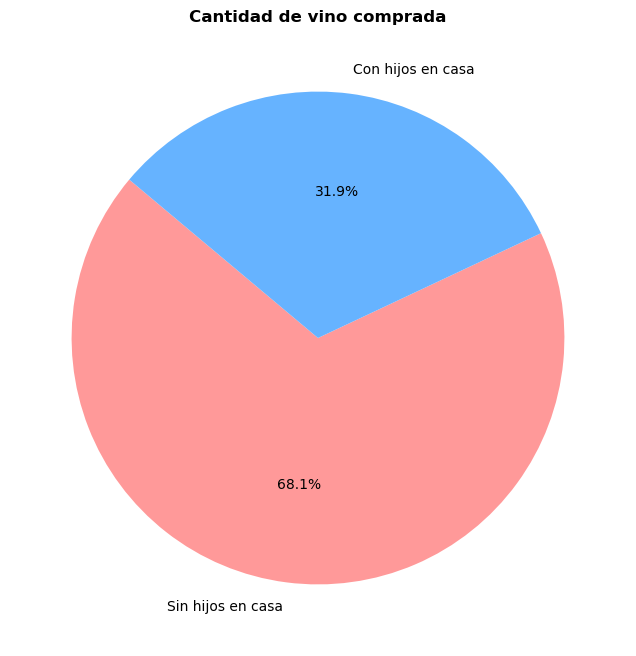

In [326]:
# Calcular la media del consumo de vino por si hay hijos en casa o no
parent_mean = df.groupby('Is_Parent')['MntWines'].mean().reset_index()

# Mapear los valores de Is_Parent para etiquetas más legibles
parent_mean['Is_Parent'] = parent_mean['Is_Parent'].map({0: 'Sin hijos en casa', 1: 'Con hijos en casa'})

# Crear una gráfica de pastel
plt.figure(figsize=(8, 8))

# Crear la gráfica de pastel
plt.pie(parent_mean['MntWines'], labels=parent_mean['Is_Parent'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)

# Añadir título
plt.title('Cantidad de vino comprada', fontweight='bold')

# Mostrar la gráfica
plt.show()

In [327]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_Revenue', 'Response', 'Education_level', 'Living_Status',
       'Age', 'Total_Campaigns_Accepted', 'Average_Spend', 'Spent',
       'Is_Parent'],
      dtype='object')

In [328]:
df['Marital_Status'].value_counts()

Marital_Status
Married     788
Together    513
Single      438
Divorced    215
Widow        70
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_16024\3011562132.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Living_Status', y='MntWines', data=gasto_por_estado_civil, palette='pastel')


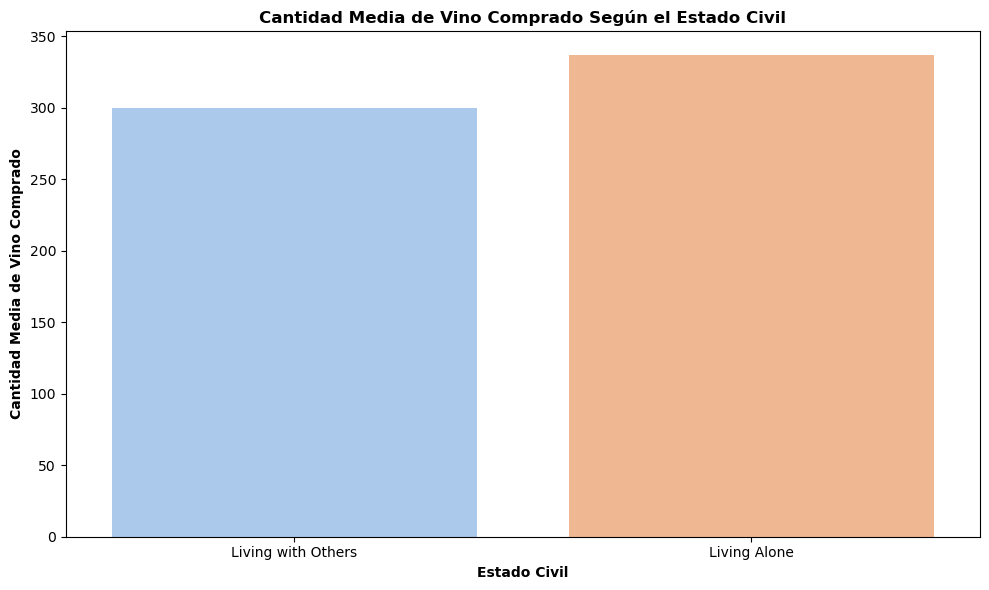

In [329]:
# Calcular la media del gasto en vino por estado civil
gasto_por_estado_civil = df.groupby('Living_Status')['MntWines'].mean().reset_index()

# Ordenar los datos por la media de gasto en vino de forma ascendente
gasto_por_estado_civil = gasto_por_estado_civil.sort_values(by='MntWines')

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Crear la gráfica de barras
sns.barplot(x='Living_Status', y='MntWines', data=gasto_por_estado_civil, palette='pastel')

# Añadir etiquetas y título
plt.xlabel('Estado Civil', fontweight='bold')
plt.ylabel('Cantidad Media de Vino Comprado', fontweight='bold')
plt.title('Cantidad Media de Vino Comprado Según el Estado Civil', fontweight='bold')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [330]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_Revenue', 'Response', 'Education_level', 'Living_Status',
       'Age', 'Total_Campaigns_Accepted', 'Average_Spend', 'Spent',
       'Is_Parent'],
      dtype='object')

In [331]:
df['Dt_Customer'].unique()

array(['2012-09-04', '2014-03-08', '2013-08-21', '2014-02-10',
       '2014-01-19', '2013-09-09', '2012-11-13', '2013-05-08',
       '2013-06-06', '2014-03-13', '2013-11-15', '2012-10-10',
       '2012-11-24', '2012-12-24', '2012-08-31', '2013-03-28',
       '2012-11-03', '2012-08-08', '2013-01-06', '2012-12-23',
       '2014-01-11', '2013-03-18', '2013-01-02', '2013-05-27',
       '2013-05-31', '2013-11-22', '2014-05-22', '2013-05-11',
       '2012-10-29', '2013-02-20', '2013-08-29', '2013-12-31',
       '2013-09-02', '2014-02-11', '2013-02-01', '2013-04-29',
       '2013-03-12', '2013-10-02', '2014-06-28', '2012-11-09',
       '2013-05-24', '2012-11-08', '2014-05-12', '2012-08-11',
       '2014-06-07', '2013-06-12', '2012-11-19', '2013-04-02',
       '2014-04-28', '2014-03-03', '2013-07-04', '2012-09-07',
       '2013-02-18', '2013-06-11', '2013-12-06', '2013-05-21',
       '2014-05-11', '2014-03-19', '2013-09-27', '2013-04-08',
       '2012-09-11', '2013-03-17', '2013-04-05', '2014-

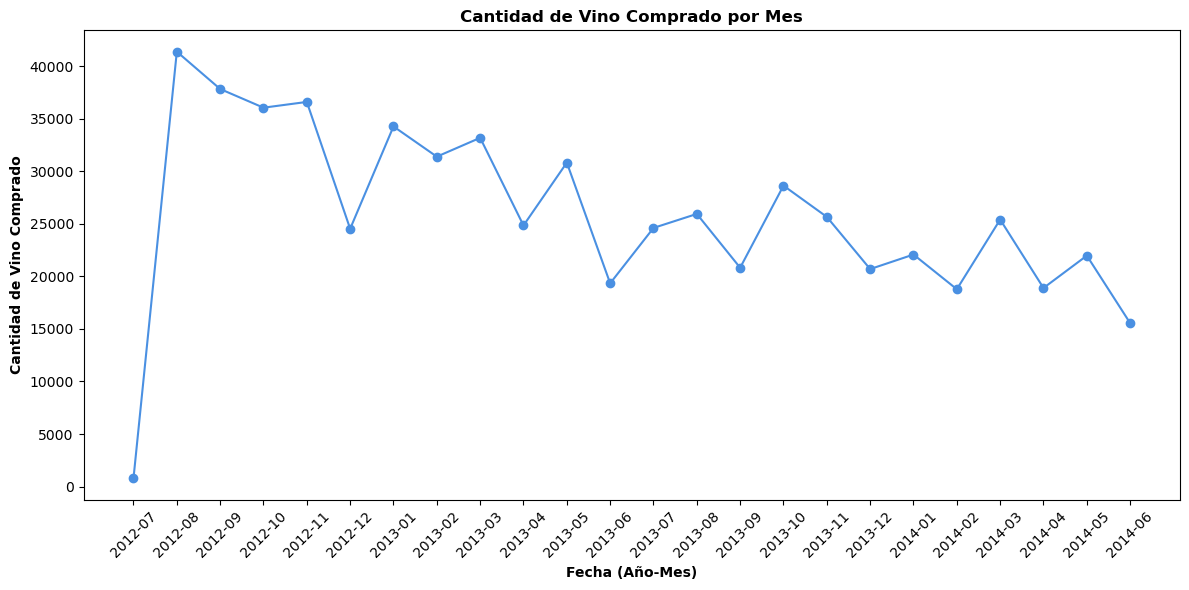

In [332]:
# Convertir la columna de fechas a tipo datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Extraer el año y el mes de la fecha
df['YearMonth'] = df['Dt_Customer'].dt.to_period('M')

# Agrupar por año y mes y calcular la suma de la cantidad de vino
monthly_sales = df.groupby('YearMonth')['MntWines'].sum().reset_index()

# Convertir 'YearMonth' a tipo string para usarlo en el gráfico
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['MntWines'], marker='o', linestyle='-', color='#4a90e2')

# Añadir etiquetas y título
plt.xlabel('Fecha (Año-Mes)', fontweight='bold')
plt.ylabel('Cantidad de Vino Comprado', fontweight='bold')
plt.title('Cantidad de Vino Comprado por Mes', fontweight='bold')

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [340]:
df['Dt_Customer'].dt.month

array([ 9,  3,  8,  2,  1, 11,  5,  6, 10, 12,  4,  7])

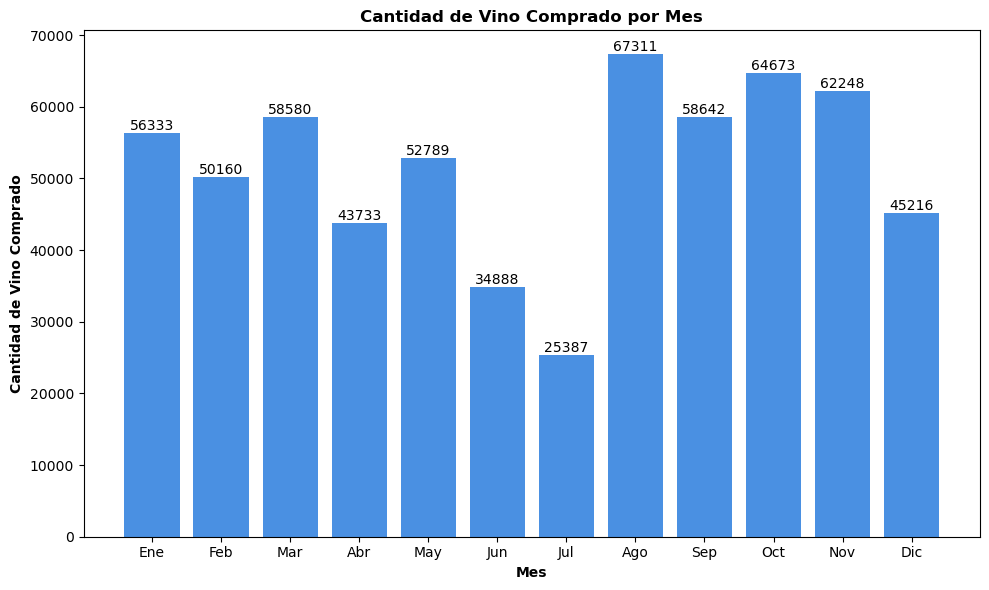

In [342]:
# Convertir la columna de fechas a tipo datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Extraer el mes de la fecha
df['Month'] = df['Dt_Customer'].dt.month

# Agrupar por mes y calcular la suma de la cantidad de vino
monthly_sales = df.groupby('Month')['MntWines'].sum().reset_index()

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['Month'], monthly_sales['MntWines'], color='#4a90e2')

# Añadir etiquetas y título
plt.xlabel('Mes', fontweight='bold')
plt.ylabel('Cantidad de Vino Comprado', fontweight='bold')
plt.title('Cantidad de Vino Comprado por Mes', fontweight='bold')

# Añadir etiquetas en la parte superior de las barras
for index, row in monthly_sales.iterrows():
    plt.text(row['Month'], row['MntWines'] + 5, str(row['MntWines']), ha='center', va='bottom')

# Ajustar el formato del eje x
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar la gráfica
plt.tight_layout()
plt.show()

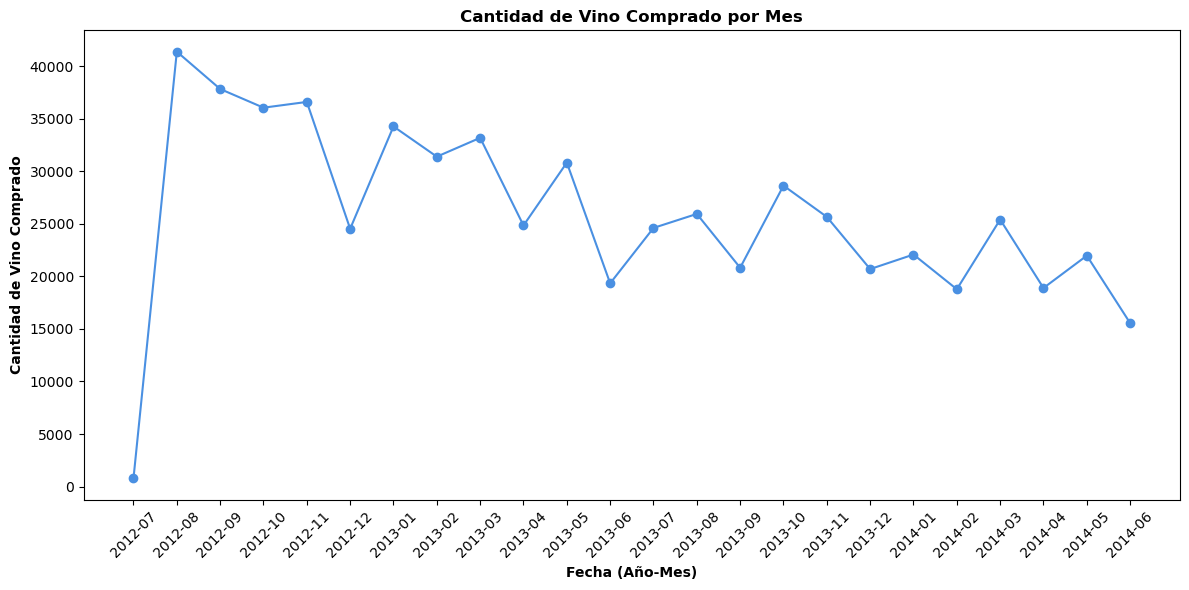

In [343]:

# Convertir la columna de fechas a tipo datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Extraer el año y el mes de la fecha
df['YearMonth'] = df['Dt_Customer'].dt.to_period('M')

# Agrupar por año y mes y calcular la suma de la cantidad de vino
monthly_sales = df.groupby('YearMonth')['MntWines'].sum().reset_index()

# Convertir 'YearMonth' a tipo string para usarlo en el gráfico
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['MntWines'], marker='o', linestyle='-', color='#4a90e2')

# Añadir etiquetas y título
plt.xlabel('Fecha (Año-Mes)', fontweight='bold')
plt.ylabel('Cantidad de Vino Comprado', fontweight='bold')
plt.title('Cantidad de Vino Comprado por Mes', fontweight='bold')

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()